In [1]:
# Import
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sqlalchemy.orm import Session

database_path = "../da_job_data.sqlite"

In [2]:
# Create Engine
engine = create_engine(f"sqlite:///{database_path}")
conn = engine.connect()

In [3]:
# Query All Records in the the Database
data = pd.read_sql("SELECT * FROM da_data", conn)

In [4]:
# Preview the Data
data.head()

,id,title,company_name,location,via,description,extensions,schedule_type,work_from_home,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,1,Data Analyst,Applicantz,Anywhere,via LinkedIn,Open to work on W2 or on Corp-to-Corp (for vis...,"['41 minutes ago', 'Work from home', 'Contract...",Contractor,TRUE,,,,"['qlik', 'power_bi', 'power_bi']"
1,2,Data Analyst I (Remote Optional),Talentify.io,Anywhere,via LinkedIn,Talentify helps candidates around the world to...,"['15 hours ago', 'Work from home', 'Full-time']",Full-time,TRUE,,,,['excel']
2,3,Data Analyst II,EDWARD JONES,"Whiteman AFB, MO",via Monster,"At Edward Jones, we help clients achieve their...","['24 hours ago', 'Full-time', 'Health insurance']",Full-time,,,,,"['sas', 'snowflake', 'excel', 'power_bi', 'pyt..."
3,4,Data Analyst,Rose International,United States,via Indeed,Position Title\nPosition Number\nLocation...\n...,['7 hours ago'],,,,,,"['excel', 'tableau', 'cognos', 'sql', 'word']"
4,5,"Senior Data Analyst [Remote or San Diego, CA]",EDF Renewables North America,Anywhere,via LinkedIn,Scope of Position\n\nThe Pre-Construction Esti...,"['21 hours ago', 'Work from home', 'Full-time']",Full-time,TRUE,,,,"['pandas', 'sql', 'tableau', 'word', 'power_bi..."


In [5]:
# closing the database connection
conn.close()

In [6]:
# select the last column specificlly mentioning required job skills
skills = data['description_tokens']

In [7]:
# count skill frequency
skill_freq = skills.str.split(r'[,\ \'\[\]]',expand=True).stack().value_counts()
skill_freq = skill_freq.drop(skill_freq.index[0])
print(skill_freq)


sql         5581
excel       3764
tableau     3077
python      2955
power_bi    2823
            ... 
vue.js         1
groovy         1
dart           1
graphql        1
tidyr          1
Length: 117, dtype: int64


In [8]:
# create dataframe for skill frequency plot (TOP 10 SKILLS)
skill_freq_df = skill_freq.to_frame().reset_index()
skill_freq_df.rename(columns = {'index':'skills', 0:'number of postings'}, inplace = True)

# select top 10 skills 
skill_top_10_df = skill_freq_df.iloc[0:10]
skill_top_10_df

,skills,number of postings
0,sql,5581
1,excel,3764
2,tableau,3077
3,python,2955
4,power_bi,2823
5,r,1991
6,sas,1134
7,powerpoint,829
8,word,787
9,snowflake,761


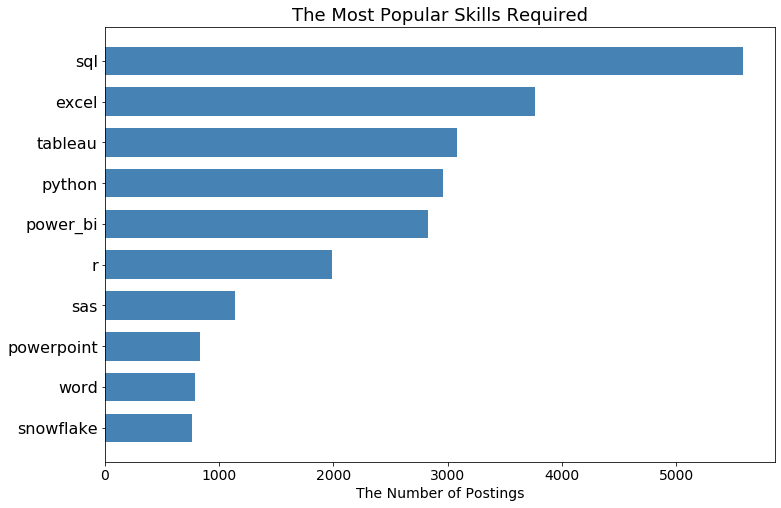

In [9]:
# Plot horizontal bar chart based on top 10 skills mentioend in the job posting.
# reverse the ranking
reversed_skill_top_10_df = skill_top_10_df.iloc[::-1]
# plot the chart
y_axis = reversed_skill_top_10_df['skills']
x_axis = reversed_skill_top_10_df['number of postings']
plt.figure(figsize = (12,8))
plt.barh(y_axis, x_axis, height=0.7, color="steelblue")
plt.title('The Most Popular Skills Required', fontsize=18)
plt.xlabel('The Number of Postings',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.show()



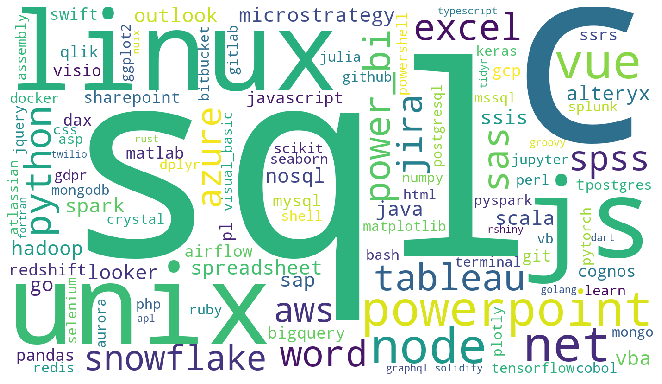

In [10]:
# Import wordcloud and stopwords package to generate wordcloud graph based on 'skills' column.
from wordcloud import WordCloud, STOPWORDS

# Word cloud on description field
comment_words = ''
stopwords = set(STOPWORDS)
stopwords.update(["work"])
 
# iterate through the csv file
for val in skill_freq_df['skills']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1400, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (9, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()
# save the image
# plt.savefig('wordcloud_skills.png')


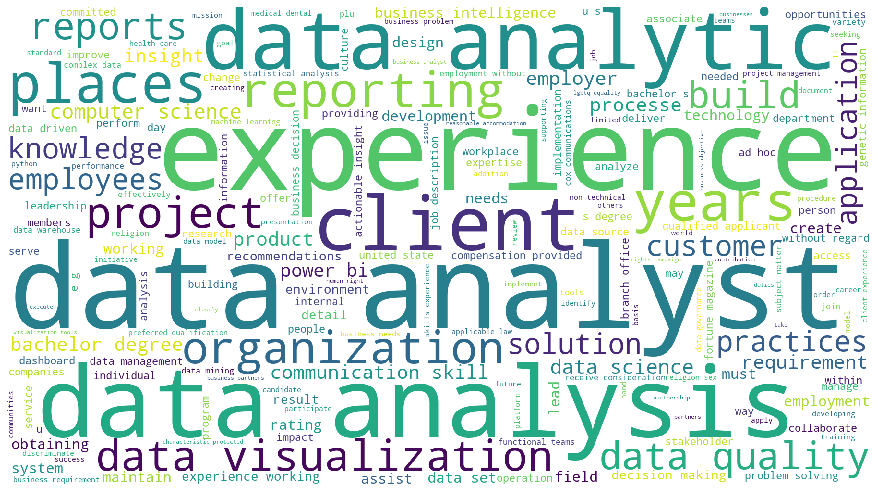

In [11]:
# Word cloud on description field
comment_words = ''
stopwords = set(STOPWORDS)
stopwords.update(["work", "ability", "support", "role", "sexual", "orientation", "responsible", "edward", "jones", "status", "support", "looking", "provide", "gender", "identity", \
                "report", "year", "race color", "equal", "opportunity", "team", "based", "able", "make", "focus", "drive", "employee", "develop", "ensure", "great", "place",\
                "race", "color", "partner", "need", "use", "understanding", "recommendation","national", "origin", "grow", "tool", \
                "help", "well", "will", "long", "term","national", "origin", "grow", "tool", "best", "practice", "company", "member", "understand", "one", \
                "meet", "salary", "range", "learn", "value","full", "time", "grow", "understand", "related", "position", "cross", "part"])
# iterate through the csv file
for val in data['description']:
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 1800, height = 1000,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
# plot the WordCloud image
plt.figure(figsize = (12, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()
# save the image
# plt.savefig('job_description.png')

In [21]:
# import NLTK package 
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize, MWETokenizer
#from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
#import seaborn as sns
#import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/xuandi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/xuandi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
# Text file of all the description content named text. (Plan A)
items = data['description'].tolist()
file = open("../data/description.txt",'w')
for item in items:
	file.write(item+"\n")
file.close()

with open("../data/description.txt") as f:
    text = f.read()

In [14]:
# A plain string of all the description content named c. (Bakc up plan)
a = data['description'].tolist()
b = []
for item in a:
    b.append(item)

c = ' '.join([str(item) for item in b])

In [16]:
# Remove all punctuations from description
# Using re.sub() replace the non-alphabetical characters with an empty string.
#^ – means it will match the pattern written on right of it.
#\w – #Return a match at every non-alphabeticalthe character(characters NOT between a and Z. Like “!”, “?” white-space, numbers including underscore etc.) and \s – matches a blank space.

from nltk.corpus import stopwords
import re
text_without_punctuations = re.sub(r'[^\w\s]', '', text)

In [18]:
# Pass text after remvoing punctuations into word_tokenize() to return tokenized text.  [taking forever for me]
text_after_tokenizing = word_tokenize(text_without_punctuations)

KeyboardInterrupt: 

In [29]:
# Compare each tokenzied word with stop words and store the words that's not in the stop words
# Store the English stop words in nltk_stop_words.
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk_stop_words = stopwords.words('english')

# Merge the hand picked stop words with nltk stop words
hand_picked_stop_words =["work", "ability", "support", "role", "sexual", "orientation", "responsible", "edward", "jones", "status", "support", "looking", "provide", "gender", "identity", \
                "report", "year", "race color", "equal", "opportunity", "team", "based", "able", "make", "focus", "drive", "employee", "develop", "ensure", "great", "place",\
                "race", "color", "partner", "need", "use", "understanding", "recommendation","national", "origin", "grow", "tool", \
                "help", "well", "will", "long", "term","national", "origin", "grow", "tool", "best", "practice", "company", "member", "understand", "one", \
                "meet", "salary", "range", "learn", "value","full", "time", "grow", "understand", "related", "position", "cross", "part"]

nltk_stop_words += hand_picked_stop_words

text_without_stopwords = [word for word in text_after_tokenizing if word.lower() not in nltk_stop_words]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/xuandi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Do Stemming using nltk : removing the suffix and considering the root word.
# from nltk.stem.porter import PorterStemmer
#stemmer = PorterStemmer()

# Create an empty list for storing stemmed words of text. 
#text_after_stemming =[]

# Using stemmer.stem() stem each word present in the previous list and store it in newly created lists.
#for word in text_without_stopwords:
    #text_after_stemming.append(stemmer.stem(word))

In [22]:
# Use Counter method find the frequency of words in sentences, paragraphs, webpage. Python Counter is a container that will hold the count of each of the elements present in the container.
# Counter method returns a dictionary with key-value pair as {‘word’,word_count}.
from collections import Counter
text_count = Counter(text_without_stopwords)

In [ ]:
#comment_words = ''
#stopwords = set(STOPWORDS)
#stopwords.update(["work", "ability", "support", "role", "sexual", "orientation", "responsible", "edward", "jones", "status", "support", "looking", "provide", "gender", "identity", \
                #"report", "year", "race color", "equal", "opportunity", "team", "based", "able", "make", "focus", "drive", "employee", "develop", "ensure", "great", "place",\
                #"race", "color", "partner", "need", "use", "understanding", "recommendation","national", "origin", "grow", "tool", \
                #"help", "well", "will", "long", "term","national", "origin", "grow", "tool", "best", "practice", "company", "member", "understand", "one", \
                #"meet", "salary", "range", "learn", "value","full", "time", "grow", "understand", "related", "position", "cross", "part"])

In [ ]:
with open("../data/description.txt") as f:
    text = f.read()

words_token = word_tokenize(text)

In [ ]:
stop_words = set(nltk.corpus.stopwords.words('english'))

filtered_words = [word for word in words if word.lower() not in stop_words]

NameError: name 'words' is not defined